In [1]:
import pandas
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import defaultdict
from wordcloud import WordCloud

In [2]:
#reading csv
df_first_emotions_csv = pandas.read_csv('./dataset/goemotions_1.csv')

## Checking dataset structure

In [3]:
print(df_first_emotions_csv.head())

                                                text       id  \
0                                    That game hurt.  eew5j0j   
1   >sexuality shouldn’t be a grouping category I...  eemcysk   
2     You do right, if you don't care then fuck 'em!  ed2mah1   
3                                 Man I love reddit.  eeibobj   
4  [NAME] was nowhere near them, he was by the Fa...  eda6yn6   

                author            subreddit    link_id   parent_id  \
0                Brdd9                  nrl  t3_ajis4z  t1_eew18eq   
1          TheGreen888     unpopularopinion  t3_ai4q37   t3_ai4q37   
2             Labalool          confessions  t3_abru74  t1_ed2m7g7   
3        MrsRobertshaw             facepalm  t3_ahulml   t3_ahulml   
4  American_Fascist713  starwarsspeculation  t3_ackt2f  t1_eda65q2   

    created_utc  rater_id  example_very_unclear  admiration  ...  love  \
0  1.548381e+09         1                 False           0  ...     0   
1  1.548084e+09        37               

#### Checking null values in dataset

In [31]:
print(df_first_emotions_csv.isnull().sum())

text                    0
id                      0
author                  0
subreddit               0
link_id                 0
parent_id               0
created_utc             0
rater_id                0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
neutral                 0
sentiment_score         0
category    

## Visualizing data

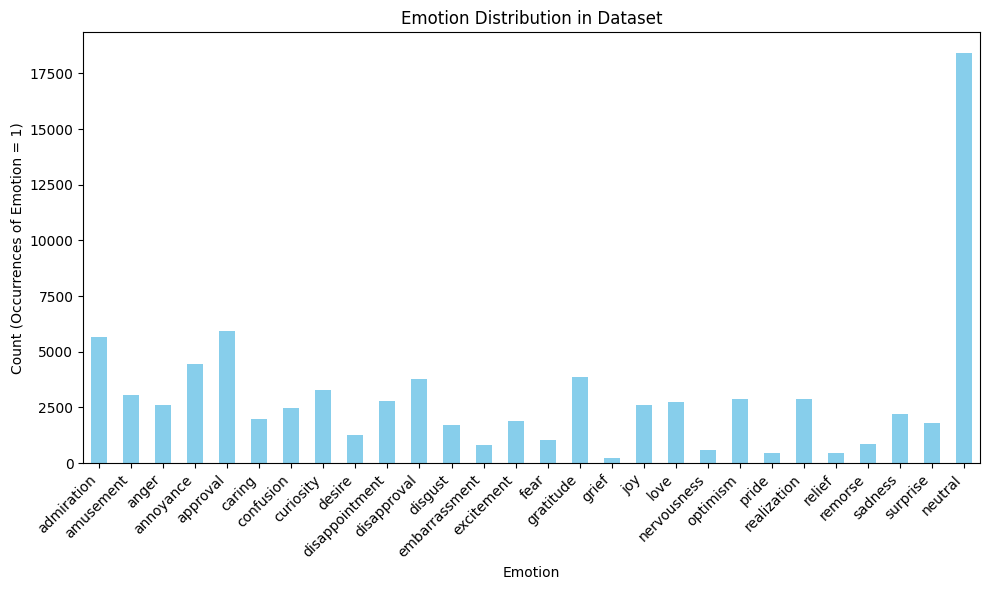

In [33]:
#creating emotion distribution bar chart

emotion_columns = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
    'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment',
    'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism',
    'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'
]

emotion_counts = (df_first_emotions_csv[emotion_columns] == True).sum()

# Plot the bar chart
plt.figure(figsize=(10,6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Emotion Distribution in Dataset')
plt.xlabel('Emotion')
plt.ylabel('Count (Occurrences of Emotion = 1)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

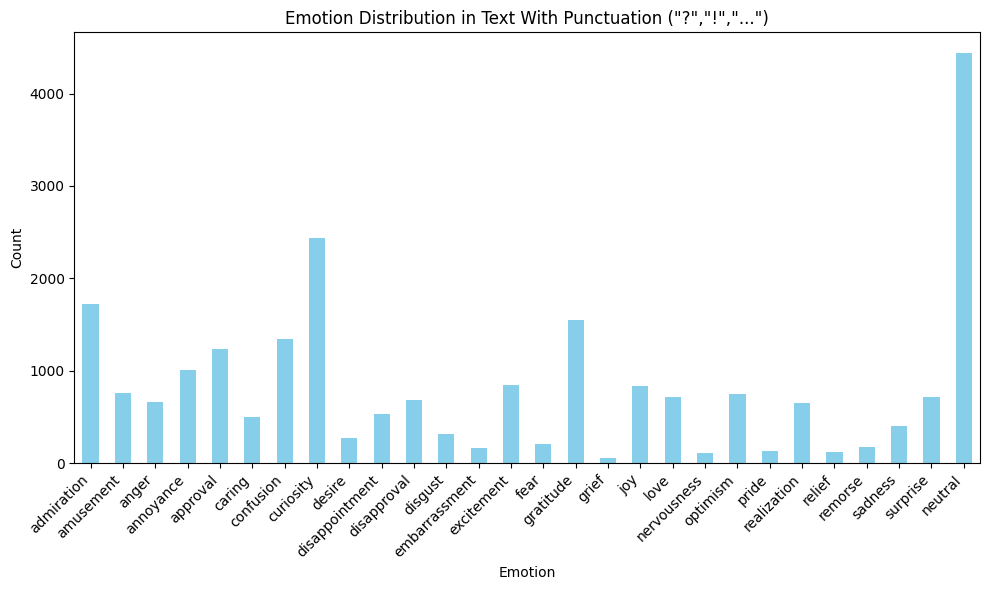

In [6]:
#creating emotion distribution with text with punctuation bar chart

regex_pattern = r"[!?]|\.\.\." 
emotion_punctuation = df_first_emotions_csv[df_first_emotions_csv['text'].str.contains(regex_pattern, regex=True)].sum()
plt.figure(figsize=(10,6))
emotion_punctuation.loc[emotion_columns].plot(kind='bar', color='skyblue')
plt.title('Emotion Distribution in Text With Punctuation ("?","!","...")')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

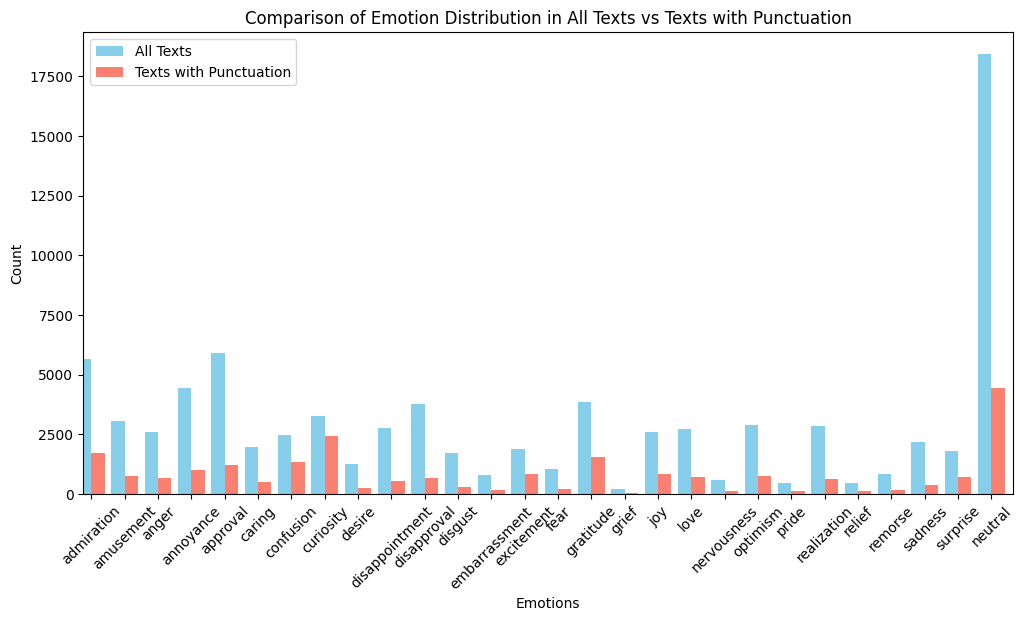

In [7]:
#Comparing emotion in text with punctuation x general

plt.figure(figsize=(12, 6))
emotion_counts.plot(kind='bar', width=0.4, position=1, color='skyblue', label='All Texts')
emotion_punctuation.loc[emotion_columns].plot(kind='bar', width=0.4, position=0, color='salmon', label='Texts with Punctuation')
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.title("Comparison of Emotion Distribution in All Texts vs Texts with Punctuation")
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.show()

In [8]:
# Initialize VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

df_first_emotions_csv['sentiment_score'] = df_first_emotions_csv['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df_first_emotions_csv['category'] = np.where(
    df_first_emotions_csv['sentiment_score'] >= 0.5,'positive',
    np.where(df_first_emotions_csv['sentiment_score'] <= -0.5,'negative','neutral')
)

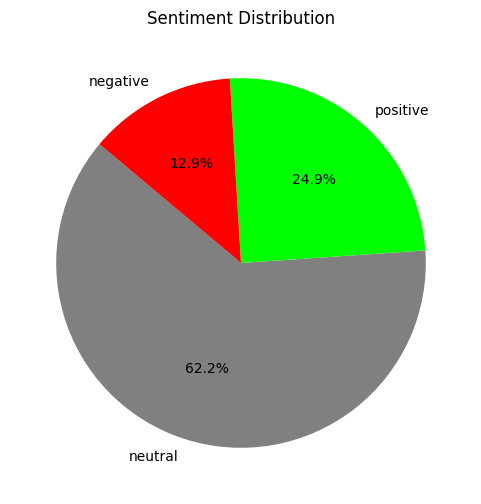

In [9]:
# Count occurrences of each sentiment category
sentiment_counts = df_first_emotions_csv['category'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts, 
    labels=sentiment_counts.index, 
    autopct='%1.1f%%', 
    colors=['gray', 'lime', 'red'], 
    startangle=140
)
plt.title('Sentiment Distribution')
plt.show()

In [10]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def preprocess_text(text):
    text = text.lower()
    words = word_tokenize(text)

    filtered_words = []
    for word in words:
        if word not in punctuation and word not in stop_words:
            filtered_words.append(word)
    return filtered_words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Colaborador\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Colaborador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Colaborador\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [11]:
# Apply preprocessing to the 'text' column
df_first_emotions_csv['processed_text'] = df_first_emotions_csv['text'].apply(preprocess_text)

In [12]:
emotion_columns = ['admiration','amusement','anger','annoyance','approval','caring','confusion','curiosity','desire','disappointment','disapproval','disgust',
    'embarrassment','excitement','fear','gratitude','grief','joy','love','nervousness','optimism','pride','realization','relief','remorse','sadness','surprise','neutral']

word_emotion_mapping = defaultdict(lambda: defaultdict(int))

for _,row in df_first_emotions_csv.iterrows():
    preprocessed_text = preprocess_text(row['text'])
    for emotion in emotion_columns:
        if row[emotion] > 0 :
          for word in preprocessed_text:
              word_emotion_mapping[word][emotion] += 1

In [13]:
word_emotion_df = pandas.DataFrame(word_emotion_mapping).T.fillna(0)
print(word_emotion_df)

          sadness  remorse  neutral  admiration  annoyance  gratitude   love  \
game         31.0      9.0    247.0       114.0       61.0       26.0   45.0   
hurt         38.0      2.0     34.0         4.0       10.0        6.0    3.0   
right        41.0     23.0    370.0       100.0       92.0       88.0   31.0   
n't         211.0     98.0   1921.0       272.0      641.0      229.0  142.0   
care         14.0      4.0     85.0        20.0       51.0        9.0   11.0   
...           ...      ...      ...         ...        ...        ...    ...   
asphalt       0.0      0.0      0.0         0.0        0.0        0.0    0.0   
lowlife       0.0      0.0      0.0         0.0        1.0        0.0    0.0   
sgt           0.0      0.0      0.0         0.0        0.0        0.0    0.0   
innuendo      0.0      0.0      1.0         0.0        0.0        0.0    0.0   
stingy        0.0      0.0      0.0         0.0        1.0        0.0    0.0   

          optimism  curiosity    joy  .

In [15]:
#word cloud
word_freq_filtered = {}
word_emotion_dict = word_emotion_df['love'].to_dict()
for word, freq in word_emotion_dict.items():
    if freq > 0:
        word_freq_filtered[word]=freq

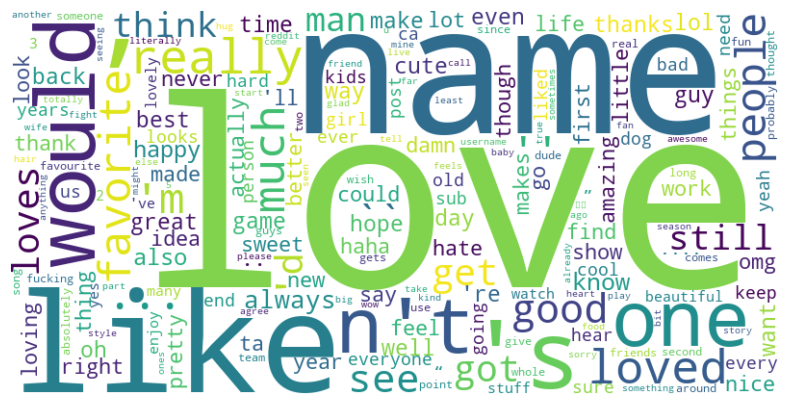

In [16]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_filtered)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()